# Phase 2 Milestone 2


## 1 - Introduction

1. Nama    : Imam Ahfas
2. Batch   : FTDS-012
3. Dataset : Women Clothing E-Commerce Review |


### Description

### Objective

Milestones 2 ini dibuat guna mengevaluasi Pembelajaran Phase 2 :

1. Mampu memahami konsep Computer Vision/NLP.
2. Mampu mempersiapkan data untuk digunakan dalam model Computer Vision/NLP.
3. Mampu mengimplementasikan Artificial Neural Network dengan data yang ada.
4. Mampu menganalisis dan menjelaskan layer yang dibuat.

### Problem Statement

Membuat model klasifikasi menggunakan NLP untuk memprediksi Women Clothing E-Commerce Review menggunakan dataset yang sudah ada.


## Working Area

## 2 - Import Libraries

In [328]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 
import string
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.keras.layers import Dense, GlobalAveragePooling1D, Input, LSTM, GRU, Dropout
from keras.layers import Bidirectional
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

import pickle, os



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 3 - Data Loading

> Bagian ini berisikan proses penyiapan data dengan memasukan dataset Women Clothing E-Commerce Review yang berformat csv

In [329]:
# Memasukan data 
df = pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")

In [330]:
# Melihat dataset 2 teratas
df.head(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [331]:
# Melihat dataset 2 terbawah
df.tail(2)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


### Informasi Dataset
|Column Name|Description|
|-|-|
|**Clothing ID**|Integer Categorical variable that refers to the specific piece being reviewed.|
|||
|**Age**|Positive Integer variable of the reviewers age.|
|||
|**Title**|String variable for the title of the review.|
|||
|**Review Text**|String variable for the review body.|
|||
|**Rating**|Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.|
|||
|**Recommended IND**|Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.|
|||
|**Positive Feedback Count**|Positive Integer documenting the number of other customers who found this review positive.|
|||
|**Division Name**|Categorical name of the product high level division.|
|||
|**Department Name**|Categorical name of the product department name.|
|||
|**Class Name**|Categorical name of the product class name.|
|||

In [332]:
# Transform data untuk memudahkan membaca dan menganalisa kolom dari data
df.head(2).T

,0,1
Unnamed: 0,0,1
Clothing ID,767,1080
Age,33,34
Title,NaN,NaN
Review Text,Absolutely wonderful - silky and sexy and comf...,Love this dress! it's sooo pretty. i happene...
Rating,4,5
Recommended IND,1,1
Positive Feedback Count,0,4
Division Name,Initmates,General
Department Name,Intimate,Dresses


> Terlihat bahwa ada enam feature yang memiliki nilai numerik yaitu, Unnamed:0, Clothing ID, Age, Rating, Recommended IND, Positive Feedback Count, ada empat feature categorical yaitu, Review Text, Division Name, Department Name, Class Name, dan juga terdapat data NaN atau missing value yang terlihat pada feature Title

In [333]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [334]:
#Unnamed: 0 di drop karena informasinya sama dengan nomor index dan tidak digunakan fiturnya dalam analisa ini
df.drop('Unnamed: 0',axis=1, inplace=True)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


> Terlihat bahwa title yang sebelumnya terlihat NaN memiliki tipe data Object dengan jumlah data yang ternyata tidak balance dengan yang lainnya, begitu juga division name, department name, dan class name

In [336]:
# Melihat missing value data
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

> Terlihat bahwa pada title terdapat 3810 missing value, Review text 845 missing value, division name, department name dan class name, masing masing memiliki 14 missing value, namun tidak dilakukan handling missing value guna melihat originalitas data ketika exploratory data analyisis


> Sebelum selanjutnya melakukan analisa lebih lanjut agar lebih mudah, maka dilakukan perubahan nama pada kolom atau feature

In [337]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [338]:
df.rename(columns = {'Clothing ID' : 'clothing_id', 'Age' : 'age' , 'Title' : 'title', 'Review Text' : 'review_text', 
                     'Rating': 'rating', 'Recommended IND' : 'recommended', 'Positive Feedback Count' : 'feedback_count', 
                     'Division Name' : 'division', 'Department Name' : 'department', 'Class Name' :'class'}, inplace=True)

In [339]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [340]:
df.describe()

,clothing_id,age,rating,recommended,feedback_count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


> Melihat deskripsi isi dari dataset, terlihat rata-rata yang memberikan review berada di umur 43 dengan rating rata-rata sebesar 4.19

In [341]:
df.describe(include=object)

,title,review_text,division,department,class
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


> Terlihat class dresses dari sebanyak 20 class yang ada, pling banyak di berikan review yaitu sebanyak 6319 review

In [342]:
# Melihat unique value dari dataset

for i in df.columns:
    print(i, 'unique: ', df[i].unique(),'\n')

clothing_id unique:  [ 767 1080 1077 ...  181  721  522] 

age unique:  [33 34 60 50 47 49 39 24 53 44 41 32 55 31 28 46 21 36 65 29 38 59 40 23
 67 48 43 52 56 66 61 57 58 37 27 62 68 51 83 69 54 63 71 30 35 64 42 22
 26 72 25 45 74 70 20 80 93 82 77 85 73 78 79 19 76 84 75 89 81 90 94 86
 99 18 91 87 92] 

title unique:  [nan 'Some major design flaws' 'My favorite buy!' ...
 'Cute, but see through'
 'Very cute dress, perfect for summer parties and we'
 'Please make more like this one!'] 

review_text unique:  ['Absolutely wonderful - silky and sexy and comfortable'
 'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'
 'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (m

> Terlihat pada fitur division terdapat typo Initmates yang seharusnya Intimates, selanjutnya akan kita lakukan replacement

In [343]:
# Merubah Initmates menjadi Intimates
df = df.replace({'Initmates' : 'Intimates'})

In [344]:
df['division'].value_counts()

General           13850
General Petite     8120
Intimates          1502
Name: division, dtype: int64

> Value sudah berubah menjadi Intimates

In [345]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

## 4 - Exploratory Data Analysis (EDA)

### Chart Jumlah Produk Recommended dan Not Recommended

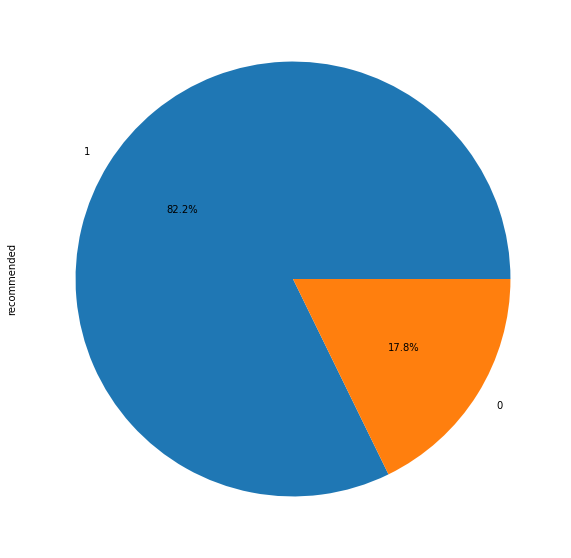

In [346]:
plt.figure(figsize=(20,10))
df['recommended'].value_counts().plot(y="recommended", kind="pie", autopct='%1.1f%%' )
plt.show()

> Terlihat bahwa data atau product not recomended sebesar 17.8% dan product recommended sebesar 82.2%

### Korelasi Class, Rating dan Recommendation

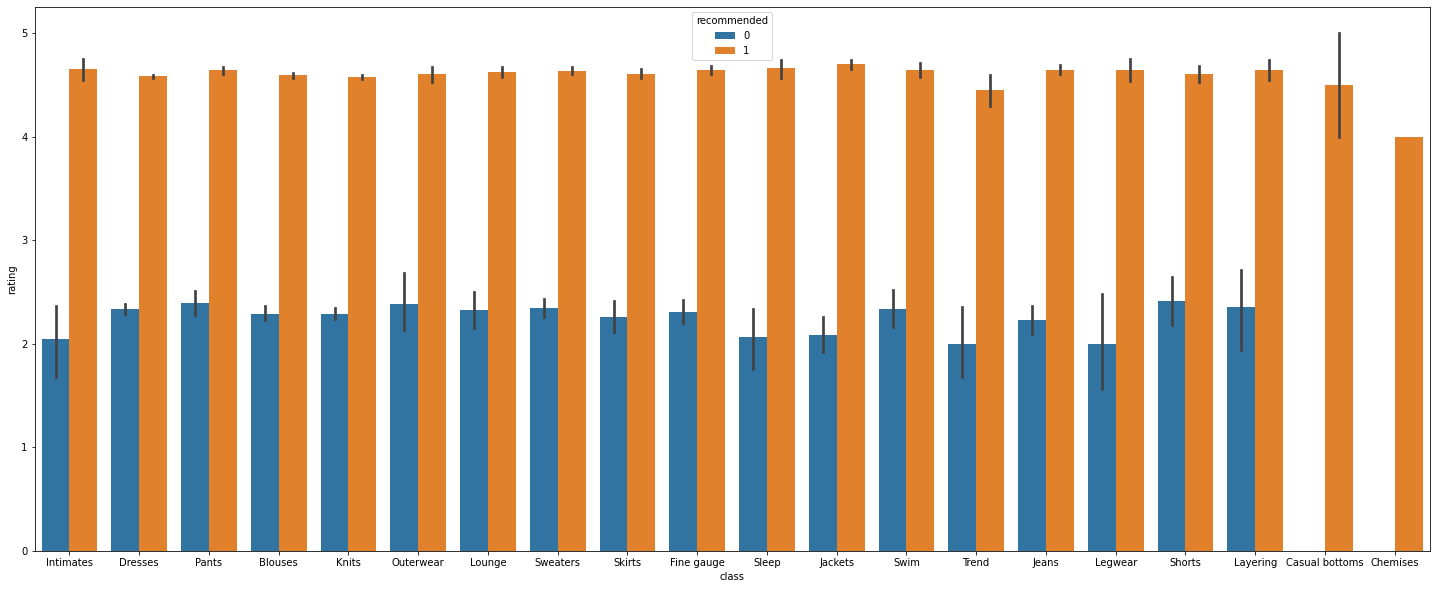

In [347]:
plt.figure(figsize=(25,10))
sns.barplot(x='class', y='rating', hue='recommended', data=df)
plt.show()

> Terlihat bahwa seluruh class produk yang menjadi rekomendasi berada di rating 4 ke atas, sedangkan yang tidak menjadi rekomendasi berada di rating 3 ke bawah, casual bottoms dan chemises tidak ada yang tidak direkomendasikan

### Korelasi Class, Feedback_count dan Recommendation

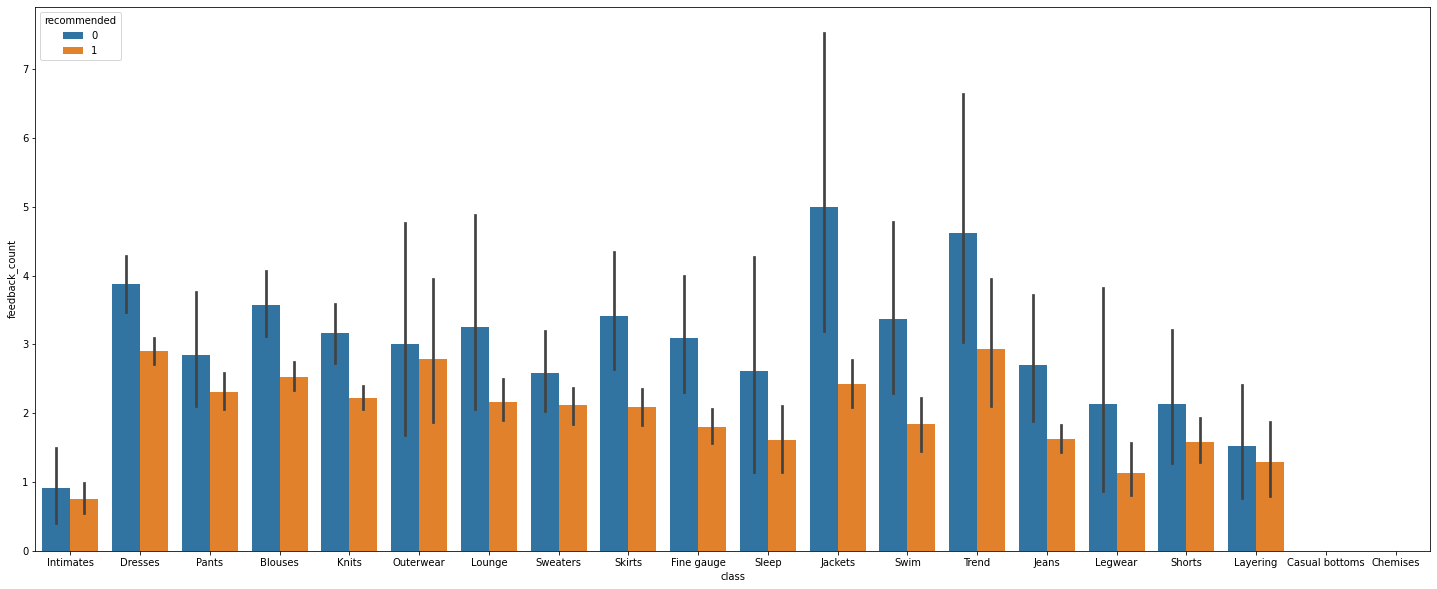

In [348]:
plt.figure(figsize=(25,10))
sns.barplot(x='class', y='feedback_count', hue='recommended', data=df)
plt.show()


> Terlihat dari semua class produk bahwa user lebih banyak memberikan feedback ketika produk tidak rekomended, yang paling banyak mendapat feedback tidak recommended adalah jackets kemudian Trend

### Distribusi Age dan Feedback_Count

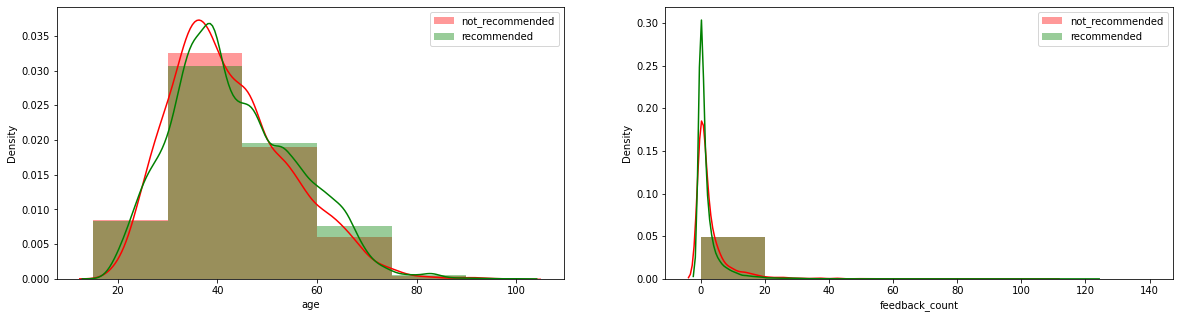

In [349]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.distplot(df.age[df.recommended==0], bins=(15, 30, 45, 60, 75, 90, 105), color="r", label="not_recommended")
sns.distplot(df.age[df.recommended==1], bins=(15, 30, 45, 60, 75, 90, 105), color="g", label="recommended")
plt.legend()
plt.subplot(1, 2, 2)
sns.distplot(df.feedback_count[df.recommended==0], bins=(0, 20, 40, 60, 80, 100, 120, 140), color="r", label="not_recommended")
sns.distplot(df.feedback_count[df.recommended==1], bins=(0, 20, 40, 60, 80, 100, 120, 140), color="g", label="recommended")
plt.legend()

> Pada chart pertama terlihat bahwa pelanggan dengan umur sekitar 30-50 lebih banyak memberikan produk not recommended, dan umur sekitar 50-70 lebih banyak memberikan produk recommended

### Korelasi antara Rating, Division, Department, Class dengan Recommendation

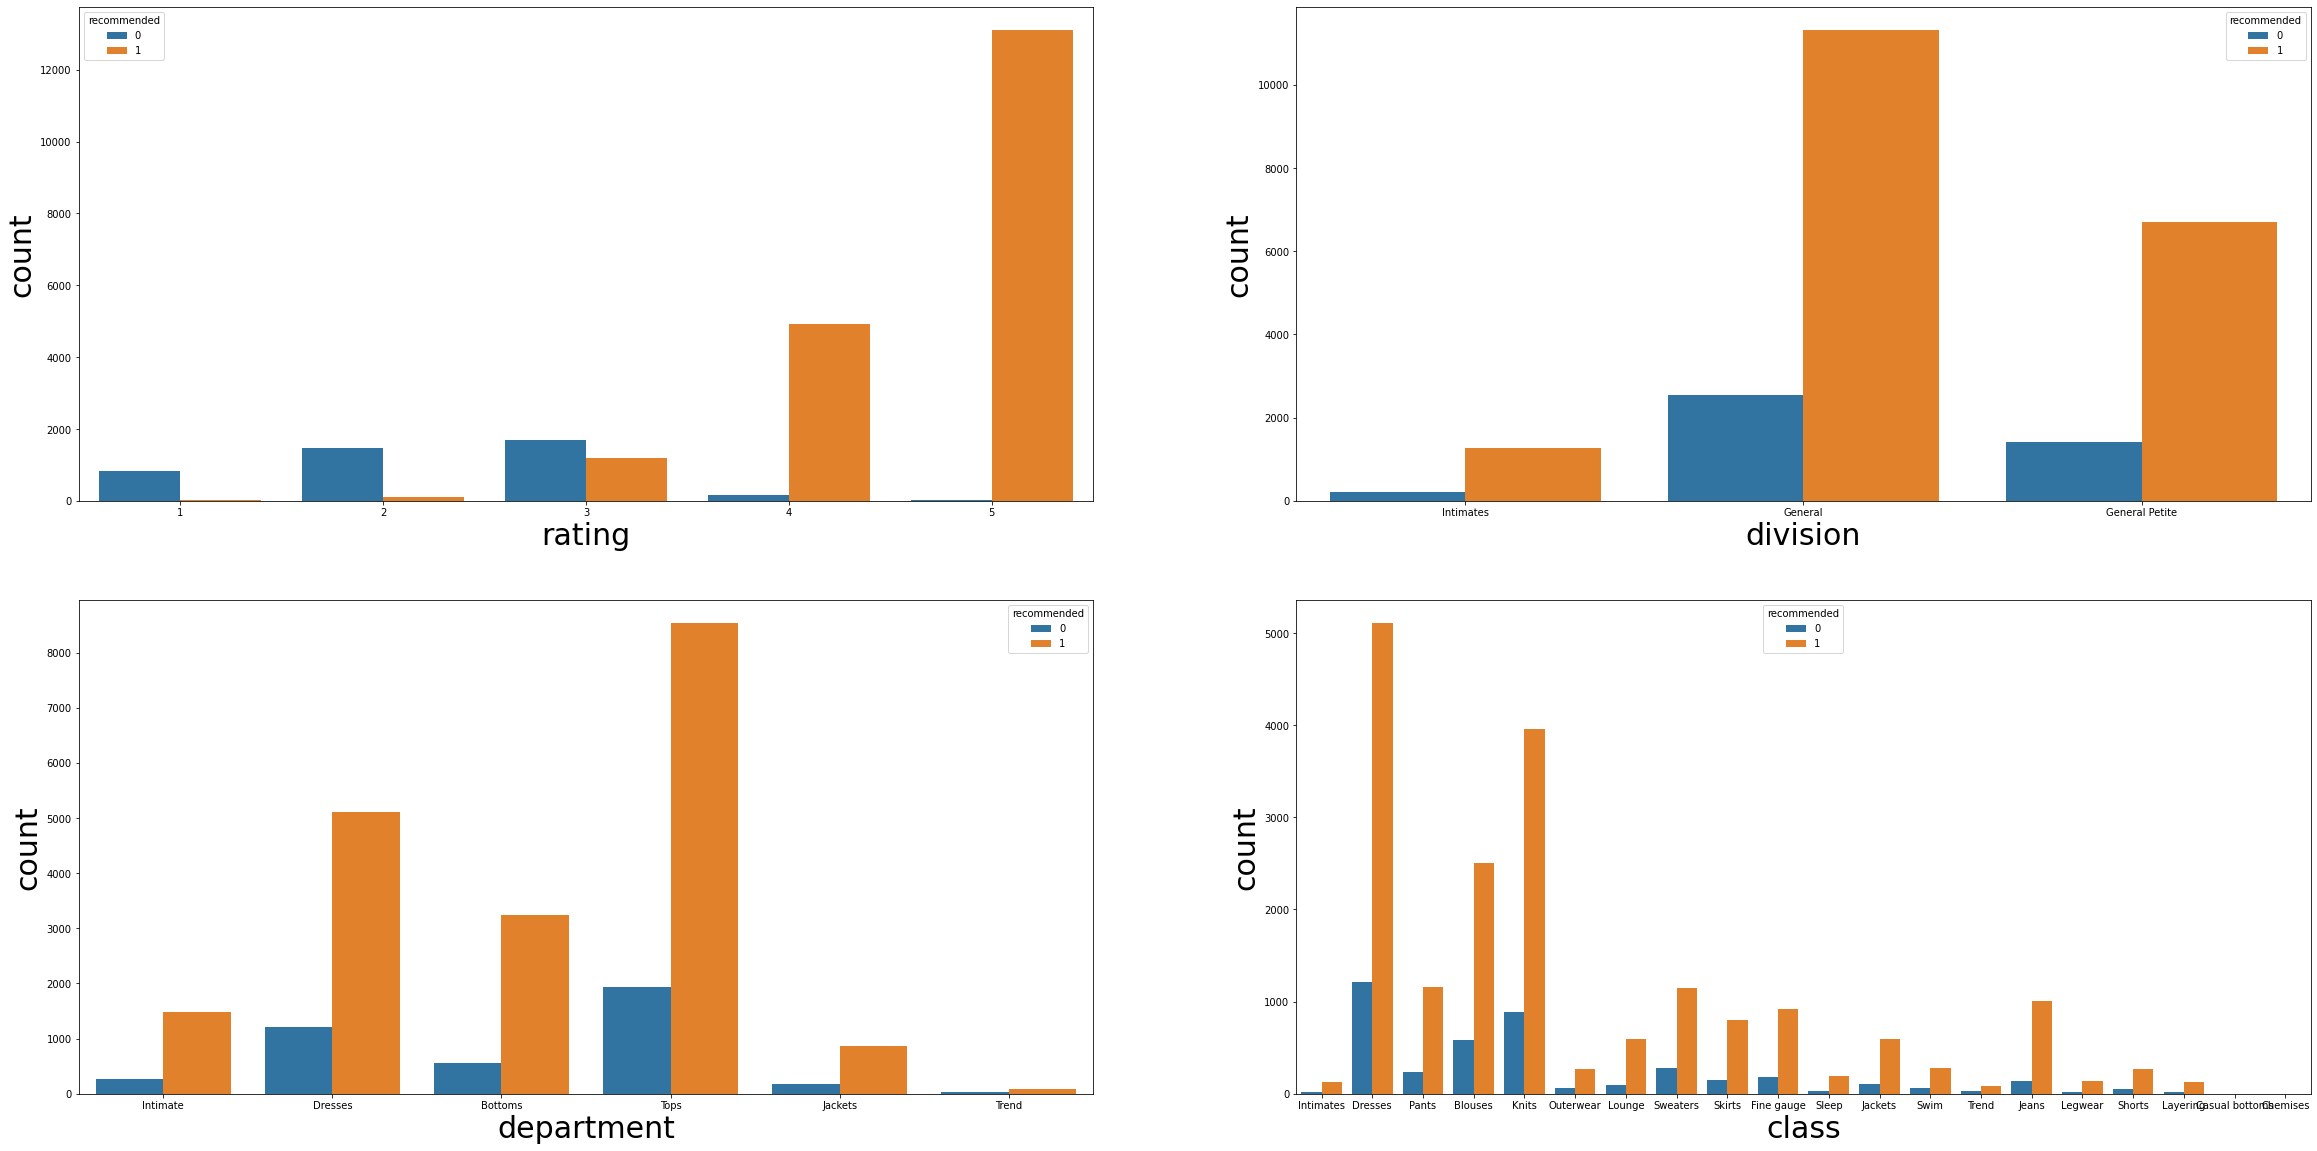

In [350]:
cat_var = ['rating', 'division', 'department', 'class']
fig, axes = plt.subplots(2, 2, figsize=(40, 20))
for cat, ax in zip(cat_var, axes.flatten()):
    a = sns.countplot(cat, data=df, hue="recommended", ax=ax)
    a.set_xlabel(cat,fontsize=30)
    a.set_ylabel("count",fontsize=30)

> Pada chart hubungan rating dengan rekomendasi terlihat bahwa rekomendasi diberikan ketika rating 4 dan 5 sedikit adanya rekomendasi ketika rating 3

> Pada chart hubungan Division dengan rekomendasi, paling banyak rekomendasi diberikan di divisi General

> Pada chart hubungan Department dengan rekomendasi terlihat bahwa Top memiliki paling banyak rekomendasi, dan yang kedua paling banyak adalah Dress

> Pada chart hubungan Produk Class dengan rekomendasi terlihat bahwa Dress memiliki rekomendasi paling banyak, dan yang kedua paling banyak adalah Knits

### Korelasi setiap feature dengan Heatmap

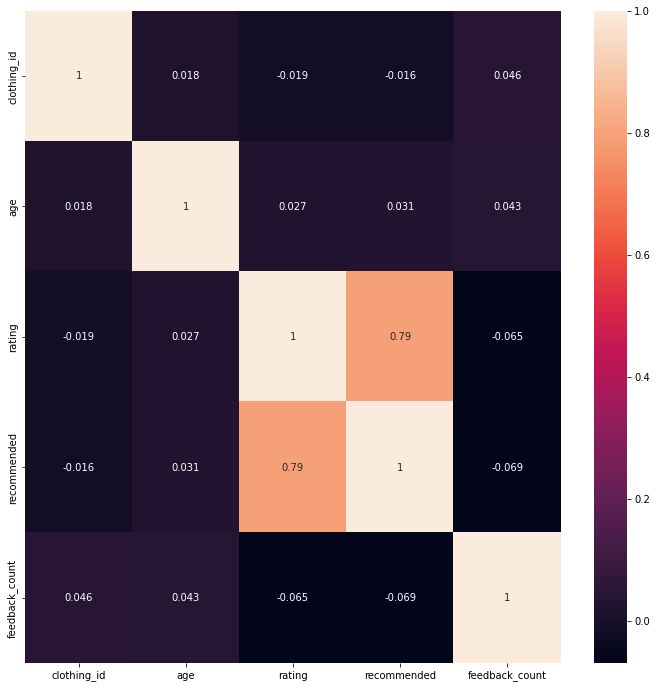

In [351]:
# Melihat hubungan antara tiap fitur menggunakan heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

> Terlihat bahwa yang memiliki nilai korelasi atau hubungan paling besar adalah recommended dengan rating

## 5 - Data Preprocessing

### Get Data for Model Inference

In [352]:
# Membuat data untuk model inference
df_inf = df.sample(10, random_state=42)
df_inf.head(2)

,clothing_id,age,title,review_text,rating,recommended,feedback_count,division,department,class
1297,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses
7228,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge


In [353]:
# Remove Inference-Set from Dataset
df_train_test =df.drop(df_inf.index)
df_train_test.head(2)

,clothing_id,age,title,review_text,rating,recommended,feedback_count,division,department,class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Intimates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses


In [354]:
# Reset Index
df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf.head(2)

,clothing_id,age,title,review_text,rating,recommended,feedback_count,division,department,class
0,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses
1,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge


### Text Preprocessing

In [355]:
df.columns

Index(['clothing_id', 'age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [356]:
# Membuat copy dataset guna menanggulangi kesalahan atau kerusakan dalam dataset
df_tx = df.copy()

In [357]:
# Dropping feature untuk mengambil fitur review_text dan recomended yang akan digunakan dalam analisa
df_tx.drop(['clothing_id', 'age', 'title', 'rating',
       'feedback_count', 'division', 'department', 'class'], axis=1, inplace=True)

In [358]:
# Melihat dataset df_tx setelah feature 
df_tx

,review_text,recommended
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
23481,I was very happy to snag this dress at such a ...,1
23482,"It reminds me of maternity clothes. soft, stre...",1
23483,"This fit well, but the top was very see throug...",0
23484,I bought this dress for a wedding i have this ...,1


In [359]:
df_tx.isnull().sum()

review_text    845
recommended      0
dtype: int64

In [360]:
df_tx.dropna(inplace=True)

In [361]:
df_tx.isnull().sum()

review_text    0
recommended    0
dtype: int64

In [362]:
df_tx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  22641 non-null  object
 1   recommended  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [363]:
print(df_tx.review_text[0])

Absolutely wonderful - silky and sexy and comfortable


## Case Folding

- Ubah teks ke lowercase
- Menghilangkan tanda baca
- Menghilangkan karakter yang tidak diperlukan
- Menghilangkan stopwords
- Lematisasi

In [364]:
#Ubah teks ke lowercase

teks = df_tx.review_text[1]
teks_lower = teks.lower()
teks_lower

'love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.'

In [365]:
#Menghilangkan tanda baca

teks_punc = teks_lower.translate(str.maketrans("","",string.punctuation))
teks_punc

'love this dress  its sooo pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am 58  i love the length on me hits just a little below the knee  would definitely be a true midi on someone who is truly petite'

In [366]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [367]:
#Tanda @ pada username hilang, sehingga nanti kita tidak bisa menghapus username dengan mudah karena tidak diperlukan

teks_punc = re.sub("@[A-Za-z0-9_]+"," ", teks_punc) #Menghilangkan mention
teks_punc = re.sub("#[A-Za-z0-9_]+"," ", teks_punc) #Menghilangkan hashtag
teks_punc = re.sub(r"\\n"," ",teks_punc) #Menghilangkan \n
teks_punc = teks_punc.strip()
teks_punc = re.sub(r"http\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub(r"www.\S+", " ", teks_punc) #Menghilangkan link
teks_punc = re.sub("[^A-Za-z\s']"," ", teks_punc) #Menghilangkan yang bukan huruf
teks_punc

'love this dress  its sooo pretty  i happened to find it in a store and im glad i did bc i never would have ordered it online bc its petite  i bought a petite and am     i love the length on me hits just a little below the knee  would definitely be a true midi on someone who is truly petite'

In [368]:
#Menghilangkan stopwords

stpwds_en = list(set(stopwords.words('english')))
tokens = word_tokenize(teks_punc)

teks_stopwords = ' '.join([word for word in tokens if word not in stpwds_en])
teks_stopwords

'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite'

In [369]:
#Lemmatization
lemma = WordNetLemmatizer()
lemmatized_string = ''.join([lemma.lemmatize(words) for words in teks_stopwords])
lemmatized_string

'love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hits little knee would definitely true midi someone truly petite'

In [370]:
#Membuat fungsi agar bisa diterapkan pada dataframe

def text_proses(teks):
  teks = teks.lower()
  teks = teks.translate(str.maketrans("","",string.punctuation))
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention jika ada
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag jika ada
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n jika ada
  teks = teks.strip()
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link jika ada
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link jika ada
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf jika ada
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_en])
  teks = ''.join([lemma.lemmatize(words) for words in teks])
  return teks

In [371]:
# Memanggil fungsi dan diterapkan pada dataset
df_tx['text_processed'] = df_tx['review_text'].apply(lambda x: text_proses(x))
df_tx.head()

,review_text,recommended,text_processed
0,Absolutely wonderful - silky and sexy and comf...,1,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,1,love dress sooo pretty happened find store im ...
2,I had such high hopes for this dress and reall...,0,high hopes dress really wanted work initially ...
3,"I love, love, love this jumpsuit. it's fun, fl...",1,love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,1,shirt flattering due adjustable front tie perf...


### Splitting Dataset

> Bagian adalah merupakan pemisahan dataset menjadi dua variabel yaitu variabel X untuk fitur dan y untuk target

In [372]:
X_train, X_test, y_train, y_test = train_test_split(df_tx.text_processed, df_tx.recommended, test_size=0.25, random_state=46, stratify=df_tx.recommended)

In [373]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<16980x15502 sparse matrix of type '<class 'numpy.int64'>'
	with 447591 stored elements in Compressed Sparse Row format>

In [374]:
X_train.iloc[0]

'great casual fall sweater comfortable bit design goes everything bought grey love fits bit big'

In [375]:
print(X_train_vec)

  (0, 5661)	1
  (0, 2031)	1
  (0, 4613)	1
  (0, 13166)	1
  (0, 2587)	1
  (0, 1210)	2
  (0, 3485)	1
  (0, 5538)	1
  (0, 4393)	1
  (0, 1501)	1
  (0, 5707)	1
  (0, 7645)	1
  (0, 4867)	1
  (0, 1161)	1
  (1, 4613)	1
  (1, 2587)	1
  (1, 7645)	1
  (1, 2502)	1
  (1, 1327)	1
  (1, 6713)	1
  (1, 15001)	1
  (1, 11195)	1
  (1, 5597)	1
  (1, 6359)	1
  (1, 5491)	1
  :	:
  (16978, 5965)	1
  (16978, 6028)	1
  (16978, 5954)	1
  (16978, 886)	1
  (16978, 11697)	1
  (16978, 9919)	1
  (16978, 8109)	1
  (16978, 5141)	1
  (16979, 13166)	1
  (16979, 1161)	1
  (16979, 14942)	1
  (16979, 11942)	1
  (16979, 9512)	1
  (16979, 7309)	2
  (16979, 9069)	1
  (16979, 14531)	1
  (16979, 6821)	1
  (16979, 3571)	1
  (16979, 5980)	1
  (16979, 3189)	1
  (16979, 10419)	1
  (16979, 15365)	1
  (16979, 12062)	1
  (16979, 4810)	1
  (16979, 12966)	1


In [376]:
Vectorize.vocabulary_.keys()

dict_keys(['great', 'casual', 'fall', 'sweater', 'comfortable', 'bit', 'design', 'goes', 'everything', 'bought', 'grey', 'love', 'fits', 'big', 'color', 'blue', 'item', 'went', 'sale', 'grab', 'im', 'glad', 'feels', 'medium', 'weight', 'could', 'throw', 'cool', 'summer', 'night', 'also', 'sparkle', 'fabric', 'think', 'really', 'nice', 'added', 'touch', 'looks', 'adorable', 'dress', 'precious', 'good', 'body', 'types', 'however', 'bust', 'extremely', 'tight', 'go', 'size', 'fit', 'chest', 'area', 'top', 'us', 'flowy', 'breathable', 'feminine', 'light', 'doesnt', 'feel', 'like', 'youre', 'wearing', 'swing', 'heavy', 'sheer', 'cami', 'underneath', 'best', 'flowers', 'less', 'structured', 'tops', 'small', 'id', 'gorgeous', 'perfect', 'springsummer', 'run', 'wideloose', 'read', 'reviews', 'ordering', 'usually', 'petite', 'recommended', 'going', 'regular', 'due', 'length', 'bottom', 'wanting', 'able', 'bend', 'comfortably', 'lbs', 'ordered', 'worked', 'well', 'received', 'many', 'compliments

In [377]:
# Membuat TFIDF atau model yang menggunakan transformer
Transformer = TfidfTransformer()

X_train_tfidf = Transformer.fit_transform(X_train_vec)
X_test_tfidf = Transformer.transform(X_test_vec)

X_train_tfidf

<16980x15502 sparse matrix of type '<class 'numpy.float64'>'
	with 447591 stored elements in Compressed Sparse Row format>

In [378]:
X_train_tfidf.shape

(16980, 15502)

In [379]:
print(X_train_tfidf)

  (0, 13166)	0.2347689978566114
  (0, 7645)	0.14114634076118807
  (0, 5707)	0.33142100839212413
  (0, 5661)	0.16523214453683976
  (0, 5538)	0.329374662085243
  (0, 4867)	0.20875487296787504
  (0, 4613)	0.27034080601180777
  (0, 4393)	0.3139677998367213
  (0, 3485)	0.2520509524514117
  (0, 2587)	0.2034842261527496
  (0, 2031)	0.27661541197473216
  (0, 1501)	0.20911929515143865
  (0, 1210)	0.4266009473928566
  (0, 1161)	0.23858465796125963
  (1, 15001)	0.1687837821837348
  (1, 14942)	0.17274407945514822
  (1, 13956)	0.21279103744989034
  (1, 13693)	0.22787673885942522
  (1, 13610)	0.13761403394848878
  (1, 13028)	0.15195956844806893
  (1, 12440)	0.2909897717312858
  (1, 11195)	0.15777944352686735
  (1, 10494)	0.11597579711691348
  (1, 8654)	0.2205832451192101
  (1, 8626)	0.12546890350751005
  :	:
  (16978, 4274)	0.10611079431044172
  (16978, 3487)	0.1778383436780388
  (16978, 2927)	0.09910503698324519
  (16978, 1010)	0.08571743682480847
  (16978, 886)	0.20192738471507943
  (16978, 857)	0

## Embedding Layer in Deep Learning with Tensorflow

In [380]:
# Melihat jumlah vocab dan panjang maksimum kalimat pada dataset
jml_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print("Jumlah vocab:",jml_vocab)
print("Panjang maksimum kalimat:",max_sen_len,"kata")

Jumlah vocab: 15502
Panjang maksimum kalimat: 58 kata


In [381]:
# Aplikasi vektorisasi pada data
text_vectorization = TextVectorization(max_tokens=jml_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None, #pemenggalan kata, misal 2, 2 kata baru koma(,)
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,) # karena menggunakan sequential API
                                       )

text_vectorization.adapt(X_train) 

In [382]:
df_tx.text_processed[0]

'absolutely wonderful silky sexy comfortable'

In [383]:
text_vectorization([df_tx.text_processed[0]])

<tf.Tensor: shape=(1, 58), dtype=int64, numpy=
array([[179, 400, 777, 503,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0]])>

In [384]:
# Melakukan embedding pada data
embedding = Embedding(input_dim=jml_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len
                      )

In [385]:
emb_res = embedding(text_vectorization([df_tx.text_processed[0]]))
emb_res

<tf.Tensor: shape=(1, 58, 128), dtype=float32, numpy=
array([[[ 0.0379384 ,  0.0094174 , -0.01562768, ..., -0.04062201,
         -0.0056561 ,  0.03147246],
        [-0.00249652,  0.01758856,  0.04665519, ...,  0.02320443,
         -0.02498256,  0.00670077],
        [-0.03351089, -0.04888615,  0.04524391, ..., -0.02539504,
         -0.03725189,  0.04606047],
        ...,
        [ 0.01124365, -0.01160238, -0.03943161, ...,  0.04657431,
          0.01444653,  0.04928737],
        [ 0.01124365, -0.01160238, -0.03943161, ...,  0.04657431,
          0.01444653,  0.04928737],
        [ 0.01124365, -0.01160238, -0.03943161, ...,  0.04657431,
          0.01444653,  0.04928737]]], dtype=float32)>

In [386]:
emb_res[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.0379384 ,  0.0094174 , -0.01562768,  0.04074028, -0.00646668,
        0.0024887 , -0.01729197, -0.04549836,  0.03396401,  0.03254538,
        0.00141782, -0.02319675, -0.00648677, -0.0215708 ,  0.02926425,
        0.01853028,  0.00127425, -0.01520533, -0.04243789, -0.02404317,
        0.01576025, -0.00148692, -0.03093581,  0.00422143,  0.0266459 ,
        0.02368747,  0.03569115, -0.03722642,  0.02128066,  0.01976882,
       -0.02508397,  0.0065521 ,  0.0179598 ,  0.03329823, -0.02985078,
        0.00622474,  0.03635855,  0.01001549,  0.03193823,  0.04063431,
       -0.01706884, -0.00028346,  0.01471417, -0.03120529,  0.01954944,
       -0.02288604,  0.03884092,  0.0486377 , -0.01743666,  0.00708038,
        0.04803023, -0.03409217,  0.00906159, -0.04986267,  0.03340552,
       -0.03101909,  0.0141705 , -0.03606809,  0.01077241,  0.04863303,
        0.02298034,  0.03765193, -0.01118404,  0.00769246, -0.01727267,
       -0.036127

## 6 - Model Definition, Training and Evaluation

> Bagian ini merupakan proses pendefinisian model, dan pada dataset ini akan digunakan Traditional Machine Learning dengan MultinomialNB, dan Deep Learning, menggunakan DNN, LMTS dan Bidirectional karena target pada dataset ini adalah melihat apakah pelanggan kemungkinan akan churn atau tidak, sehingga akan dilihat performanya menggunakan metric classification report dan confusion matrix

## Traditional Machine Learning - MultinomialNB

In [388]:
# Merubah format to array
X_train_sc = X_train_tfidf.todense()
X_test_sc = X_test_tfidf.todense()

In [394]:
# Modeling menggunakan MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_sc, y_train)

y_pred = nb.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      1025
           1       0.82      1.00      0.90      4636

    accuracy                           0.82      5661
   macro avg       0.91      0.51      0.47      5661
weighted avg       0.85      0.82      0.75      5661



> Terlihat dari hasil classification report pada model MultinomialNB memiliki Accuracy sebesar 82%, dengan recall, 2 persen pada target tidak rekomended, dan 100 persen pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit dan belum baik pada target produk tidak rekomended

In [396]:
cm_ml = confusion_matrix(y_test, y_pred)

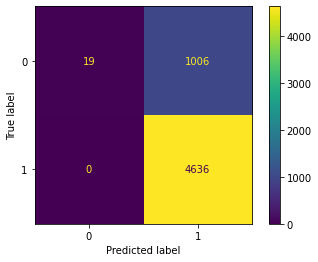

In [397]:
cm_display = ConfusionMatrixDisplay(cm_ml).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 1006 dari jumlah kemungkinan produk rekomendednya rekomendednya 4636

## Deep Learning - Fully Connected Layer

In [398]:
y_train.value_counts()

1    13904
0     3076
Name: recommended, dtype: int64

In [399]:
y_test.value_counts()

1    4636
0    1025
Name: recommended, dtype: int64

In [400]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16980,), (16980,), (5661,), (5661,))

## Model DNN

In [401]:
# sequential DNN
model_DNN1 = Sequential()
model_DNN1.add(text_vectorization)
model_DNN1.add(embedding)
model_DNN1.add(Dense(32,activation='relu'))
model_DNN1.add(Dense(1, activation='sigmoid'))

# compile
model_DNN1.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

# train
history = model_DNN1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
531/531 [==============================] - 3s 5ms/step - loss: 0.4765 - accuracy: 0.8190 - val_loss: 0.4628 - val_accuracy: 0.8199
Epoch 2/50
531/531 [==============================] - 3s 5ms/step - loss: 0.4595 - accuracy: 0.8207 - val_loss: 0.4643 - val_accuracy: 0.8194
Epoch 3/50
531/531 [==============================] - 3s 5ms/step - loss: 0.4575 - accuracy: 0.8220 - val_loss: 0.4633 - val_accuracy: 0.8194
Epoch 4/50
531/531 [==============================] - 3s 5ms/step - loss: 0.4565 - accuracy: 0.8221 - val_loss: 0.4666 - val_accuracy: 0.8193
Epoch 5/50
531/531 [==============================] - 3s 5ms/step - loss: 0.4555 - accuracy: 0.8224 - val_loss: 0.4645 - val_accuracy: 0.8194
Epoch 6/50
531/531 [==============================] - 3s 5ms/step - loss: 0.4550 - accuracy: 0.8224 - val_loss: 0.4646 - val_accuracy: 0.8194
Epoch 7/50
531/531 [==============================] - 3s 5ms/step - loss: 0.4545 - accuracy: 0.8225 - val_loss: 0.4667 - val_accuracy: 0.8194
Epoch 

In [402]:
model_DNN1_df = pd.DataFrame(model_DNN1.history.history)
model_DNN1_df

,loss,accuracy,val_loss,val_accuracy
0,0.476470,0.818975,0.462786,0.819899
1,0.459535,0.820670,0.464293,0.819439
2,0.457485,0.821951,0.463287,0.819381
3,0.456541,0.822074,0.466618,0.819317
4,0.455524,0.822358,0.464463,0.819430
5,0.454980,0.822437,0.464636,0.819418
6,0.454504,0.822495,0.466704,0.819424
7,0.454169,0.822484,0.466109,0.819351
8,0.454133,0.822566,0.466393,0.819372
9,0.453664,0.822594,0.467339,0.819284


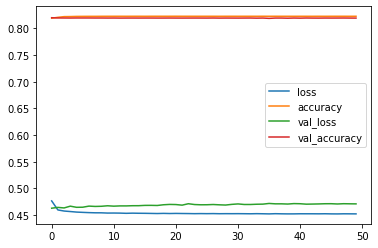

In [403]:
model_DNN1_df.plot()

> Terlihat plot dari hasil model sudah baik, karena nilai loss dan accuracy tidak begitu berbeda atau naik, tidak ada explode atau vanish

In [404]:
model_DNN1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, 58)               0         
 ectorization)                                                   
                                                                 
 embedding_8 (Embedding)     (None, 58, 128)           1984256   
                                                                 
 dense_18 (Dense)            (None, 58, 32)            4128      
                                                                 
 dense_19 (Dense)            (None, 58, 1)             33        
                                                                 
Total params: 1,988,417
Trainable params: 1,988,417
Non-trainable params: 0
_________________________________________________________________


In [405]:
model_DNN1.evaluate(X_train, y_train)

531/531 [==============================] - 2s 3ms/step - loss: 0.4515 - accuracy: 0.8227


[0.4515228569507599, 0.822748064994812]

In [406]:
model_DNN1.evaluate(X_test, y_test)

177/177 [==============================] - 1s 3ms/step - loss: 0.4709 - accuracy: 0.8192


[0.4708986282348633, 0.819207489490509]

#### Classification Report

In [407]:
# membuat model evaluasi 
y_pred_train = np.argmax(model_DNN1.predict(X_train), axis=1)
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.24      0.05      0.08      3076
           1       0.82      0.97      0.89     13904

    accuracy                           0.80     16980
   macro avg       0.53      0.51      0.48     16980
weighted avg       0.72      0.80      0.74     16980



> Terlihat dari hasil classification report pada model DNN memiliki Accuracy sebesar 80%, dengan recall, 5 persen pada target tidak rekomended, dan 97% pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit dan belum baik pada target produk tidak rekomended

In [408]:
# membuat model evaluasi 
y_pred_test = np.argmax(model_DNN1.predict(X_test), axis=1)
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.24      0.05      0.08      1025
           1       0.82      0.97      0.89      4636

    accuracy                           0.80      5661
   macro avg       0.53      0.51      0.48      5661
weighted avg       0.72      0.80      0.74      5661



> Terlihat dari hasil classification report pada model DNN memiliki Accuracy sebesar 80%, dengan recall, 5 persen pada target tidak rekomended, dan 97% pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit dan belum baik pada target produk tidak rekomended

#### Confusion Matrix

In [409]:
cm_DNN1_train = confusion_matrix(y_train, y_pred_train)

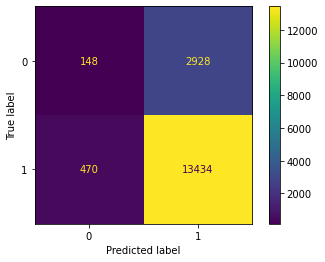

In [410]:
cm_display = ConfusionMatrixDisplay(cm_DNN1_train).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 2928 dari jumlah kemungkinan produk rekomendednya 13434

In [411]:
cm_DNN1_test = confusion_matrix(y_test, y_pred_test)

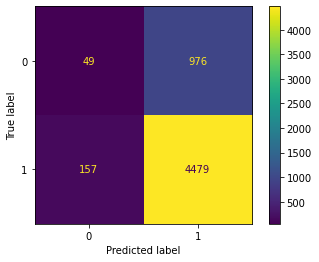

In [412]:
cm_display = ConfusionMatrixDisplay(cm_DNN1_test).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 976 dari jumlah kemungkinan produk rekomendednya 4479

## LSTM

Cara Word Embedding 1

In [413]:
# sequential LSTM
model_LSTM = Sequential()
model_LSTM.add(text_vectorization)
model_LSTM.add(embedding)
model_LSTM.add(LSTM(32))
model_LSTM.add(Dense(1,activation='sigmoid'))

# compile
model_LSTM.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

# train
history = model_LSTM.fit(X_train, y_train, epochs=50,
                         validation_data=(X_test, y_test))

Epoch 1/50
531/531 [==============================] - 6s 7ms/step - loss: 0.2180 - accuracy: 0.9092 - val_loss: 0.3402 - val_accuracy: 0.8825
Epoch 2/50
531/531 [==============================] - 3s 6ms/step - loss: 0.1279 - accuracy: 0.9516 - val_loss: 0.3107 - val_accuracy: 0.8774
Epoch 3/50
531/531 [==============================] - 3s 6ms/step - loss: 0.1000 - accuracy: 0.9638 - val_loss: 0.4194 - val_accuracy: 0.8756
Epoch 4/50
531/531 [==============================] - 3s 6ms/step - loss: 0.0817 - accuracy: 0.9702 - val_loss: 0.4805 - val_accuracy: 0.8707
Epoch 5/50
531/531 [==============================] - 3s 6ms/step - loss: 0.0673 - accuracy: 0.9753 - val_loss: 0.5063 - val_accuracy: 0.8682
Epoch 6/50
531/531 [==============================] - 3s 6ms/step - loss: 0.0567 - accuracy: 0.9802 - val_loss: 0.5701 - val_accuracy: 0.8642
Epoch 7/50
531/531 [==============================] - 3s 6ms/step - loss: 0.0490 - accuracy: 0.9827 - val_loss: 0.7620 - val_accuracy: 0.8617
Epoch 

In [414]:
model_LSTM_df = pd.DataFrame(model_LSTM.history.history)
model_LSTM_df

,loss,accuracy,val_loss,val_accuracy
0,0.218022,0.909246,0.340233,0.882530
1,0.127877,0.951649,0.310713,0.877407
2,0.099957,0.963781,0.419408,0.875640
3,0.081684,0.970200,0.480527,0.870694
4,0.067337,0.975324,0.506345,0.868221
5,0.056676,0.980212,0.570113,0.864158
6,0.048990,0.982744,0.762034,0.861685
7,0.043716,0.984511,0.600788,0.857976
8,0.048402,0.983510,0.652425,0.860095
9,0.037165,0.987515,0.729201,0.859565


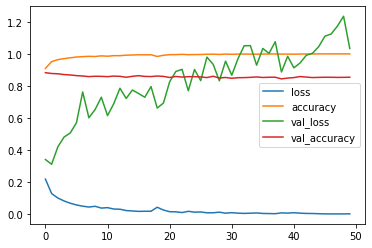

In [415]:
model_LSTM_df.plot()

#### Classification Report

In [416]:
y_pred_train = model_LSTM.predict(X_train)
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3076
           1       1.00      1.00      1.00     13904

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980



> Terlihat dari hasil classification report memiliki Accuracy sebesar 100%, dengan recall, 100% pada target tidak rekomended, dan 100% pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit 

In [417]:
y_pred_test = model_LSTM.predict(X_test)
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.61      0.53      0.57      1025
           1       0.90      0.93      0.91      4636

    accuracy                           0.85      5661
   macro avg       0.76      0.73      0.74      5661
weighted avg       0.85      0.85      0.85      5661



> Terlihat dari hasil classification report memiliki Accuracy sebesar 85%, dengan recall, 53% pada target tidak rekomended, dan 93% pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit dan belum baik pada target produk tidak rekomended

#### Confusion Matrix

In [418]:
cm_LSTM_train = confusion_matrix(y_train, y_pred_train)

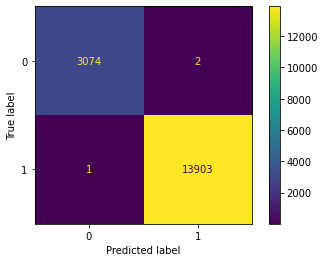

In [419]:
cm_display = ConfusionMatrixDisplay(cm_LSTM_train).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 2 dari jumlah kemungkinan produk rekomendednya 13903

In [420]:
cm_LSTM_test = confusion_matrix(y_test, y_pred_test)

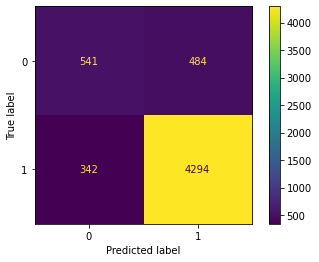

In [421]:
cm_display = ConfusionMatrixDisplay(cm_LSTM_test).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 484 dari jumlah kemungkinan produk rekomendednya 4294

## Bidirectional1

In [422]:
# sequential Bidirectional
model_bidi = Sequential()
model_bidi.add(text_vectorization)
model_bidi.add(embedding)
model_bidi.add(Bidirectional(GRU(units = 48, return_sequences = True)))
model_bidi.add(Dropout(0.5))
model_bidi.add(Bidirectional(GRU(units = 24, return_sequences = True)))
model_bidi.add(Dropout(0.5))
model_bidi.add(Bidirectional(GRU(units = 12)))
model_bidi.add(Dense(1,activation='sigmoid'))

# compile
model_bidi.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", 
                           verbose = 1, patience = 5, restore_best_weights = True)

# train
history = model_bidi.fit(X_train,
                         y_train,
                         epochs=25, batch_size= 256, class_weight = {0:19, 1:81},   
                         validation_data=(X_test, y_test), callbacks = [early_stop])

Epoch 1/25
67/67 [==============================] - 14s 60ms/step - loss: 12.6158 - accuracy: 0.8400 - val_loss: 0.4171 - val_accuracy: 0.8677
Epoch 2/25
67/67 [==============================] - 2s 31ms/step - loss: 2.9693 - accuracy: 0.9720 - val_loss: 0.5357 - val_accuracy: 0.8615
Epoch 3/25
67/67 [==============================] - 2s 31ms/step - loss: 1.7154 - accuracy: 0.9855 - val_loss: 0.5701 - val_accuracy: 0.8511
Epoch 4/25
67/67 [==============================] - 2s 31ms/step - loss: 1.2790 - accuracy: 0.9899 - val_loss: 0.6547 - val_accuracy: 0.8564
Epoch 5/25
67/67 [==============================] - 2s 31ms/step - loss: 1.0141 - accuracy: 0.9918 - val_loss: 0.6983 - val_accuracy: 0.8576
Epoch 6/25
67/67 [==============================] - 2s 32ms/step - loss: 0.7852 - accuracy: 0.9946 - val_loss: 0.7542 - val_accuracy: 0.8521
Epoch 6: early stopping


In [423]:
model_bidi_df = pd.DataFrame(model_bidi.history.history)
model_bidi_df

,loss,accuracy,val_loss,val_accuracy
0,12.615823,0.839988,0.417138,0.867691
1,2.969291,0.972026,0.535676,0.861509
2,1.715440,0.985512,0.570050,0.851086
3,1.278950,0.989870,0.654710,0.856386
4,1.014115,0.991755,0.698329,0.857622
5,0.785162,0.994582,0.754165,0.852146


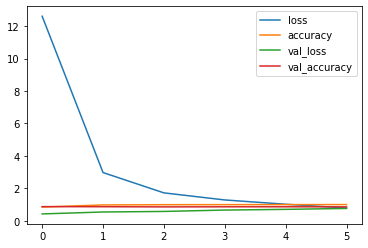

In [424]:
model_bidi_df.plot()

#### Classification Report

In [425]:
y_pred_train = model_bidi.predict(X_train)
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3076
           1       0.97      0.99      0.98     13904

    accuracy                           0.96     16980
   macro avg       0.96      0.92      0.94     16980
weighted avg       0.96      0.96      0.96     16980



> Terlihat dari hasil classification report memiliki Accuracy sebesar 96%, dengan recall, 84% pada target tidak rekomended, dan 99% pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit dan belum baik pada target produk tidak rekomended

In [426]:
y_pred_test = model_bidi.predict(X_test)
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.48      0.57      1025
           1       0.89      0.95      0.92      4636

    accuracy                           0.87      5661
   macro avg       0.79      0.72      0.75      5661
weighted avg       0.86      0.87      0.86      5661



> Terlihat dari hasil classification report memiliki Accuracy sebesar 87%, dengan recall, 48% pada target tidak rekomended, dan 95% pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit dan belum baik pada target produk tidak rekomended

#### Confusion Matrix

In [427]:
cm_bidi1_train = confusion_matrix(y_train, y_pred_train)

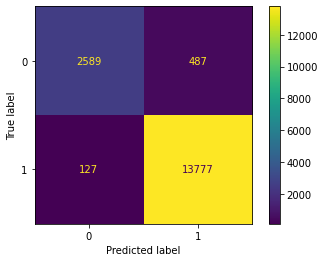

In [428]:
cm_display = ConfusionMatrixDisplay(cm_bidi1_train).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 487 dari jumlah kemungkinan produk rekomendednya 13777

In [429]:
cm_bidi1_test = confusion_matrix(y_test, y_pred_test)

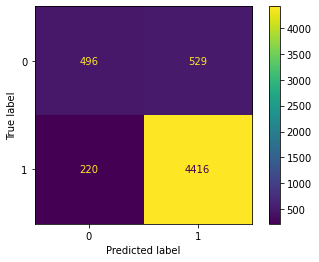

In [430]:
cm_display = ConfusionMatrixDisplay(cm_bidi1_test).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 529 dari jumlah kemungkinan produk rekomendednya 4416

## Bidirectional2

In [431]:
# sequential Bidirectional
model_bidi2 = Sequential()
model_bidi2.add(text_vectorization)
model_bidi2.add(embedding)
model_bidi2.add(Bidirectional(LSTM(units = 48, return_sequences = True)))
model_bidi2.add(Dropout(0.5))
model_bidi2.add(Bidirectional(LSTM(units = 24, return_sequences = True)))
model_bidi2.add(Dropout(0.5))
model_bidi2.add(Bidirectional(LSTM(units = 12)))
model_bidi2.add(Dense(1,activation='sigmoid'))

# compile
model_bidi2.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", 
                           verbose = 1, patience = 5, restore_best_weights = True)

# train
history = model_bidi2.fit(X_train,
                         y_train,
                         epochs=25, batch_size= 256, class_weight = {0:19, 1:81},   
                         validation_data=(X_test, y_test))

Epoch 1/25
67/67 [==============================] - 12s 63ms/step - loss: 14.5903 - accuracy: 0.8087 - val_loss: 0.4322 - val_accuracy: 0.8189
Epoch 2/25
67/67 [==============================] - 2s 33ms/step - loss: 4.0525 - accuracy: 0.9415 - val_loss: 0.4277 - val_accuracy: 0.8638
Epoch 3/25
67/67 [==============================] - 2s 33ms/step - loss: 2.4642 - accuracy: 0.9812 - val_loss: 0.4936 - val_accuracy: 0.8647
Epoch 4/25
67/67 [==============================] - 2s 33ms/step - loss: 1.8668 - accuracy: 0.9832 - val_loss: 0.5536 - val_accuracy: 0.8589
Epoch 5/25
67/67 [==============================] - 2s 33ms/step - loss: 1.1659 - accuracy: 0.9914 - val_loss: 0.6029 - val_accuracy: 0.8546
Epoch 6/25
67/67 [==============================] - 2s 33ms/step - loss: 0.9202 - accuracy: 0.9933 - val_loss: 0.6709 - val_accuracy: 0.8590
Epoch 7/25
67/67 [==============================] - 2s 33ms/step - loss: 0.6737 - accuracy: 0.9949 - val_loss: 0.7159 - val_accuracy: 0.8562
Epoch 8/25


In [432]:
model_bidi2_df = pd.DataFrame(model_bidi2.history.history)
model_bidi2_df

,loss,accuracy,val_loss,val_accuracy
0,14.590250,0.808657,0.432170,0.818937
1,4.052476,0.941461,0.427709,0.863805
2,2.464241,0.981154,0.493577,0.864688
3,1.866804,0.983157,0.553573,0.858859
4,1.165916,0.991402,0.602898,0.854619
5,0.920240,0.993286,0.670949,0.859035
6,0.673713,0.994876,0.715914,0.856209
7,0.501117,0.996643,0.752283,0.855149
8,0.407539,0.997585,0.783398,0.841724
9,0.483668,0.996113,0.791615,0.857446


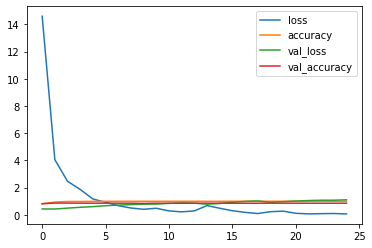

In [433]:
model_bidi2_df.plot()

#### Classification Report

In [434]:
y_pred_train = model_bidi2.predict(X_train)
y_pred_train = np.where(y_pred_train > 0.5, 1, 0)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3076
           1       1.00      1.00      1.00     13904

    accuracy                           1.00     16980
   macro avg       1.00      1.00      1.00     16980
weighted avg       1.00      1.00      1.00     16980



> Terlihat dari hasil classification report memiliki Accuracy sebesar 100%, dengan recall, 100% pada target tidak rekomended, dan 100% pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit dan belum baik pada target produk tidak rekomended

In [435]:
y_pred_test = model_bidi2.predict(X_test)
y_pred_test = np.where(y_pred_test > 0.5, 1, 0)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55      1025
           1       0.89      0.94      0.91      4636

    accuracy                           0.85      5661
   macro avg       0.76      0.71      0.73      5661
weighted avg       0.84      0.85      0.85      5661



> Terlihat dari hasil classification report memiliki Accuracy sebesar 85%, dengan recall, 49% pada target tidak rekomended, dan 94% pada produk rekomended, dataset imbalance mungkin menjadi sebab hasil overfit dan belum baik pada target produk tidak rekomended

#### Confusion Matrix

In [436]:
cm_bidi1_train = confusion_matrix(y_train, y_pred_train)

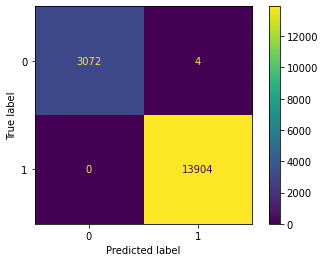

In [437]:
cm_display = ConfusionMatrixDisplay(cm_bidi1_train).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 4 dari jumlah kemungkinan produk rekomendednya 13904

In [438]:
cm_bidi1_test = confusion_matrix(y_test, y_pred_test)

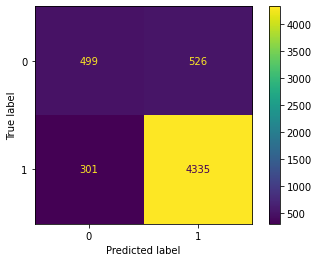

In [439]:
cm_display = ConfusionMatrixDisplay(cm_bidi1_test).plot()

> Pada matrix terlihat bahwa product yang kemungkinan rekomended yang ternyata tidak rekomended adalah 526 dari jumlah kemungkinan produk rekomendednya 4335

## 7 - Model Saving

### Save Model

In [440]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [441]:
%pwd

'/content/drive/My Drive'

In [442]:
%cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [443]:
# Freeze Model
model_bidi.trainable = False

In [444]:
# save model
model_bidi.save("ecommerce_review")

INFO:tensorflow:Assets written to: ecommerce_review/assets


INFO:tensorflow:Assets written to: ecommerce_review/assets


> model yang digunakan adalah dari Bidirectional 1 karena memiliki hasil yang lebih baik dari segi recall dan accuracy, yang tidak terlalu overfit

## 8 - Model Inference

> Bagian ini merupakan pembuatan model inferens atau melihat data baru berdasarkan model deep learning yang sudah dibuat

In [445]:
# Melihat unique value dari dataset

for i in df_inf.columns:
    print(i, 'unique: ', df_inf[i].unique(),'\n')

clothing_id unique:  [1095  903  830 1047 1110  820 1059 1092   22  394] 

age unique:  [34 57 56 36 30 37 39] 

title unique:  ['Size up if busty' 'Snap front hoodie' 'Adorable'
 'Fraying after 2 wears!' 'Fabulous material....' 'Run and buy.....' nan
 'Sbags easily' 'Please bring this shirt back!!!'] 

review_text unique:  ['I agree with the other reviewer that the color isn\'t as pink in person and more subtle. my thoughts below on some other things:\r\n__________\r\npros:\r\n- pockets! makes it so fun and chic with the overall style.\r\n- the material is lovely and breathable. i didn\'t find it sheer at all! of course, i didn\'t wear it outside the dressing room. the material is thicker but it hangs on the body well.\r\n- runs "mostly" tts. i only tried on the medium and it fit everywhere being slightly tighter in the chest. i'
 'I have many sweaters but i bought this during the sale and it is very soft and comfortable.'
 'Beautiful top but runs a whole size small. gave to my daught

In [446]:
# Mereset index
df_inf.reset_index(inplace=True)

In [447]:
# Melihat dataset teratas
df_inf.head(2)

,index,clothing_id,age,title,review_text,rating,recommended,feedback_count,division,department,class
0,0,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses
1,1,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge


In [448]:
# Melihat informasi dataset
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           10 non-null     int64 
 1   clothing_id     10 non-null     int64 
 2   age             10 non-null     int64 
 3   title           8 non-null      object
 4   review_text     9 non-null      object
 5   rating          10 non-null     int64 
 6   recommended     10 non-null     int64 
 7   feedback_count  10 non-null     int64 
 8   division        10 non-null     object
 9   department      10 non-null     object
 10  class           10 non-null     object
dtypes: int64(6), object(5)
memory usage: 1008.0+ bytes


In [450]:
# Menghilangkan NaN yang ada di dataset inferensial
df_inf.dropna(inplace=True)

In [451]:
# Melihat dataset setelah menghilangkan NaN
df_inf

,index,clothing_id,age,title,review_text,rating,recommended,feedback_count,division,department,class
0,0,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses
1,1,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge
2,2,830,56,Adorable,Beautiful top but runs a whole size small. gav...,4,1,3,General,Tops,Blouses
3,3,1047,36,Fraying after 2 wears!,I loved these pants.they are so comfortable. h...,3,0,3,General Petite,Bottoms,Pants
4,4,1110,30,Fabulous material....,I ordered this dress in a petite but it arrive...,5,1,0,General,Dresses,Dresses
5,5,820,36,Run and buy.....,Such a cute shirt! i picked up the white-with-...,5,1,11,General Petite,Tops,Blouses
7,7,1092,39,Sbags easily,I liked this dress but wasn't sure about the c...,5,1,5,General,Dresses,Dresses
8,8,22,30,Please bring this shirt back!!!,This is my favorite shirt ever. i've had it fo...,5,1,0,General,Tops,Knits


In [452]:
# Memproses data inferensial dengan fungsi preprocess dataset
df_inf['text_processed_inf'] = df_inf['review_text'].apply(lambda x: text_proses(x))
df_inf

,index,clothing_id,age,title,review_text,rating,recommended,feedback_count,division,department,class,text_processed_inf
0,0,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses,agree reviewer color isnt pink person subtle t...
1,1,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge,many sweaters bought sale soft comfortable
2,2,830,56,Adorable,Beautiful top but runs a whole size small. gav...,4,1,3,General,Tops,Blouses,beautiful top runs whole size small gave daugh...
3,3,1047,36,Fraying after 2 wears!,I loved these pants.they are so comfortable. h...,3,0,3,General Petite,Bottoms,Pants,loved pantsthey comfortable however wearing tw...
4,4,1110,30,Fabulous material....,I ordered this dress in a petite but it arrive...,5,1,0,General,Dresses,Dresses,ordered dress petite arrived regular rest fit ...
5,5,820,36,Run and buy.....,Such a cute shirt! i picked up the white-with-...,5,1,11,General Petite,Tops,Blouses,cute shirt picked whitewithflowers shown onlin...
7,7,1092,39,Sbags easily,I liked this dress but wasn't sure about the c...,5,1,5,General,Dresses,Dresses,liked dress wasnt sure color tried anyway orig...
8,8,22,30,Please bring this shirt back!!!,This is my favorite shirt ever. i've had it fo...,5,1,0,General,Tops,Knits,favorite shirt ever ive years still looks grea...


In [453]:
# Membuat variabel dari text yang diproses
inf_train = df_inf['text_processed_inf']

In [454]:
# Evaluasi model inferensial
y_pred_inf = model_bidi.predict(inf_train)

In [455]:
# Melihat hasil model
y_pred_inf

array([[0.9929268 ],
       [0.7788184 ],
       [0.7706434 ],
       [0.16799583],
       [0.9920312 ],
       [0.99391264],
       [0.9872939 ],
       [0.34414288]], dtype=float32)

In [456]:
# merubah nilai menjadi 1 (rekomended) dan 0 (tidak rekomended), agar lebih mudah memaknai hasil prediksi
model_bidi_inf = []

for items in y_pred_inf:
    if items > 0.5:
        items = 1
        model_bidi_inf.append(items)
    else:
        items = 0
        model_bidi_inf.append(items)
model_bidi_inf

[1, 1, 1, 0, 1, 1, 1, 0]

In [457]:
# membuat dataframe hasil inference
model_bidi_pred_inf_df = pd.DataFrame(model_bidi_inf, columns=['model_bidi - Prediction'])

In [458]:
df_inf['model_bidi - Prediction'] = model_bidi_inf

In [459]:
df_inf

,index,clothing_id,age,title,review_text,rating,recommended,feedback_count,division,department,class,text_processed_inf,model_bidi - Prediction
0,0,1095,34,Size up if busty,I agree with the other reviewer that the color...,4,1,19,General,Dresses,Dresses,agree reviewer color isnt pink person subtle t...,1
1,1,903,57,Snap front hoodie,I have many sweaters but i bought this during ...,4,1,0,General Petite,Tops,Fine gauge,many sweaters bought sale soft comfortable,1
2,2,830,56,Adorable,Beautiful top but runs a whole size small. gav...,4,1,3,General,Tops,Blouses,beautiful top runs whole size small gave daugh...,1
3,3,1047,36,Fraying after 2 wears!,I loved these pants.they are so comfortable. h...,3,0,3,General Petite,Bottoms,Pants,loved pantsthey comfortable however wearing tw...,0
4,4,1110,30,Fabulous material....,I ordered this dress in a petite but it arrive...,5,1,0,General,Dresses,Dresses,ordered dress petite arrived regular rest fit ...,1
5,5,820,36,Run and buy.....,Such a cute shirt! i picked up the white-with-...,5,1,11,General Petite,Tops,Blouses,cute shirt picked whitewithflowers shown onlin...,1
7,7,1092,39,Sbags easily,I liked this dress but wasn't sure about the c...,5,1,5,General,Dresses,Dresses,liked dress wasnt sure color tried anyway orig...,1
8,8,22,30,Please bring this shirt back!!!,This is my favorite shirt ever. i've had it fo...,5,1,0,General,Tops,Knits,favorite shirt ever ive years still looks grea...,0


> Terlihat model bidirectional 1 memberikan hasil inference hasil prediksi yang baik tidak ada miss predict sesuai dengan accuracynya yang sekitar 90%

## 9 - Conclusions, Assumptions and Overall Analysis

Telah dilakukan analisa dan pemodelan Deep Learning dengan 5 model yaitu Traditional MultinomialNB, Model DNN, LSTM, Bidirectional1 dan Bidirectional2,
dengan menggunakan dataset Women Clothing E-Commerce Review dengan detail sebagai berikut:
- Persiapan data yang kemudian digunakan dalam 5 Pemodelan, memasukan data, mencangkup EDA analysis, kemudian melakukan seleksi fitur, handling missing value, kemudian dilakukan preprocessing menggunakan Case Folding: Mengubah teks ke lowercase, menghilangkan tanda baca, menghilangkan karakter yang tidak diperlukan, menghilangkan stopwords, lematisasi, mengembalikan kata ke kata dasarnya, lalu splitting dataset menjadi train, dan test, embedding dan vectorizer pada dataset kemudian dimasukan kedalam model
- Implementasi 5 model untuk mencari yang terbaik, membuat prediksi, melakukan training pada model, model evaluasi dengan mendapatkan hasil accuracy dan recall dan model terbaik adalah model bidirectional1 dengan nilai pada X_train accuracy: 96% , nilai recall 84% untuk target product yang tidak rekomended dan 99% untuk target product yang rekomended, melakukan model inferens dan mendapat data prediksi klasifikasi Women Clothing Ecommerce Review dengan menggunakan NLP.
- Disclaimer: mungkin data akan berubah-ubah setelah dilakukan Re-Run pada model, oleh karenanya narasi dari Classification Report dan Confusion Matrix bisa berbeda, namun seharusnya hasilnya tidak akan berbeda jauh dari yang sudah dinarasikan


Terimakasih


Source : 

https://www.kaggle.com/code/nandinibagga/women-reviews-visualization-sentiment-analysis

https://www.kaggle.com/code/azizozmen/nlp-comparative-rnn-dl-models-with-detailed-eda